In [0]:
'''
This notebook uses different algorithm to train a model on brisque features data and determines which model is giving best accuracy.

'''

In [0]:
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = SVC(kernel = 'linear', C = 1)

trainDF = pd.read_csv('/content/drive/My Drive/TrainFeatures.csv')
testDF = pd.read_csv('/content/drive/My Drive/TestFeatures.csv')

x_train = trainDF.drop(['label'], axis = 1)
y_train = trainDF['label']

x_test = testDF.drop(['label'], axis = 1)
y_test = testDF['label']

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

def acc_score(model):
    return np.mean(cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy"))

def acc_score_1(model):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc


def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Good","Predicted Poor", "Predicted Pixelate"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Good","Predicted Poor", "Predicted Pixelate"]
    cm.index=["Actual Good","Actual Poor", "Actual Pixelate"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

clf.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(clf)))
cm = confusion_matrix_model(clf)
print("Accuracy: " + str(acc_score_1(clf)))

print(1)
cm

Accuracy: 0.7975785882274999
Accuracy: 0.8309373202990225
1


,Predicted Good,Predicted Poor,Predicted Pixelate
Actual Good,0.89,0.01,0.10
Actual Poor,0.28,0.62,0.10
Actual Pixelate,0.15,0.00,0.84


In [0]:
models = [
          RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0),
          KNeighborsClassifier(n_neighbors=5),
          GaussianNB(),
          DecisionTreeClassifier(class_weight=None, criterion="gini", max_depth=5,
                                 max_features=None, max_leaf_nodes=None, 
                                 min_impurity_split=1e-07, min_samples_leaf=0.0,
                                 presort=False, random_state=None, splitter="best")
          ]

CV = 5 
entries = []
for model in models: 
  model_name = model.__class__.__name__
  print(model_name)
  accuracies = cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy")
  for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])        

RandomForestClassifier
LinearSVC
MultinomialNB
LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFa

KNeighborsClassifier
GaussianNB
DecisionTreeClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536:

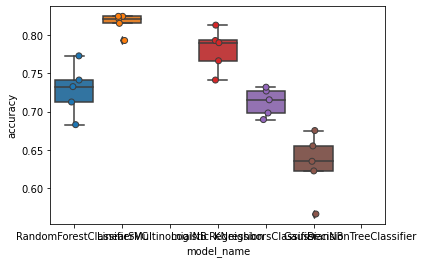

In [0]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot (x='model_name', y='accuracy', data= cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=6, jitter=True, edgecolor='gray',linewidth=1)
plt.show()

In [0]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier         NaN
GaussianNB                0.630818
KNeighborsClassifier      0.712490
LinearSVC                 0.815986
LogisticRegression        0.780900
MultinomialNB                  NaN
RandomForestClassifier    0.728553
Name: accuracy, dtype: float64